<!-- WARNING: THIS FILE WAS AUTOGENERATED! DO NOT EDIT! -->

In [1]:
#|output: asis
#| echo: false
show_doc(Tiler)

---

[source](https://github.com/mayrajeo/drone_detector/tree/master/blob/master/drone_detector/processing/tiling.py#L15){target="_blank" style="float:right; font-size:smaller"}

### Tiler

>      Tiler (outpath, gridsize_x:int=400, gridsize_y:int=400,
>             overlap:Tuple[int,int]=(100, 100))

Similar functions than ´solaris.tile.raster_tile' but with more recent dependencies.

In [2]:
#|output: asis
#| echo: false
show_doc(Tiler.tile_raster)

---

[source](https://github.com/mayrajeo/drone_detector/tree/master/blob/master/drone_detector/processing/tiling.py#L29){target="_blank" style="float:right; font-size:smaller"}

### Tiler.tile_raster

>      Tiler.tile_raster (path_to_raster:str, allow_partial_data:bool=False)

Tiles specified raster to `self.gridsize_x` times `self.gridsize_y` grid, with `self.overlap` pixel overlap

In [3]:
#|output: asis
#| echo: false
show_doc(Tiler.tile_vector)

---

[source](https://github.com/mayrajeo/drone_detector/tree/master/blob/master/drone_detector/processing/tiling.py#L69){target="_blank" style="float:right; font-size:smaller"}

### Tiler.tile_vector

>      Tiler.tile_vector (path_to_vector:str, min_area_pct:float=0.0)

Tiles a vector data file into smaller tiles. Converts all multipolygons to a regular polygons. `min_area_pct` is be used to specify the minimum area for partial masks to keep. Default value 0.0 keeps all masks.

In [4]:
#|output: asis
#| echo: false
show_doc(Tiler.tile_and_rasterize_vector)

---

[source](https://github.com/mayrajeo/drone_detector/tree/master/blob/master/drone_detector/processing/tiling.py#L100){target="_blank" style="float:right; font-size:smaller"}

### Tiler.tile_and_rasterize_vector

>      Tiler.tile_and_rasterize_vector (path_to_raster:str, path_to_vector:str,
>                                       column:str, keep_bg_only:bool=False)

Rasterizes vectors based on tiled rasters. Requires that shapefile has numeric data in `column`. By default only keeps the patches that contain polygon data, by specifying `keep_bg_only=True` saves also masks for empty patches.

In [5]:
#|output: asis
#| echo: false
show_doc(untile_vector)

---

[source](https://github.com/mayrajeo/drone_detector/tree/master/blob/master/drone_detector/processing/tiling.py#L159){target="_blank" style="float:right; font-size:smaller"}

### untile_vector

>      untile_vector (path_to_targets:str, outpath:str,
>                     non_max_suppression_thresh:float=0.0,
>                     nms_criterion:str='score')

Create single shapefile from a directory of predicted shapefiles

In [6]:
#|output: asis
#| echo: false
show_doc(copy_sum)

---

[source](https://github.com/mayrajeo/drone_detector/tree/master/blob/master/drone_detector/processing/tiling.py#L154){target="_blank" style="float:right; font-size:smaller"}

### copy_sum

>      copy_sum (merged_data, new_data, merged_mask, new_mask, **kwargs)

Make new pixels have the sum of two overlapping pixels as their value. Useful with prediction data

In [7]:
#|output: asis
#| echo: false
show_doc(untile_raster)

---

[source](https://github.com/mayrajeo/drone_detector/tree/master/blob/master/drone_detector/processing/tiling.py#L130){target="_blank" style="float:right; font-size:smaller"}

### untile_raster

>      untile_raster (path_to_targets:str, outfile:str, method:str='first')

Merge multiple patches from `path_to_targets` into a single raster`

In [ ]:
f = gpd.read_file('example_data/R70C21.shp')
f.head()
f['label_id'] = f.apply(lambda row: 2 if row.label == 'Standing' else 1, axis=1)
f.to_file('example_data/R70C21.shp')

Example area looks like this

In [ ]:
from rasterio import plot as rioplot

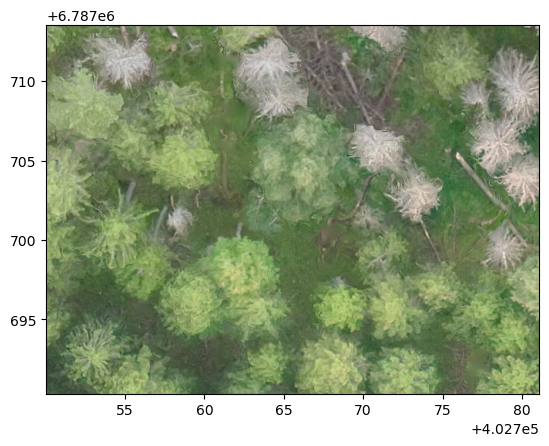

<AxesSubplot: >

In [ ]:
raster = rio.open('example_data/R70C21.tif')
rioplot.show(raster)

With `rasterio.plot` it is a lot easier to visualize shapefile and raster simultaneously

<AxesSubplot: >

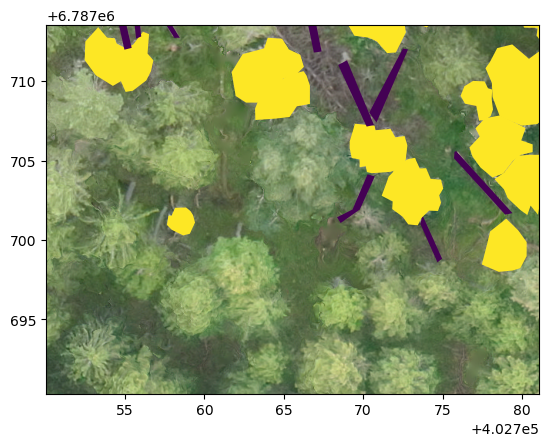

In [ ]:
fig, ax = plt.subplots(1,1)
rioplot.show(raster, ax=ax)
f.plot(ax=ax, column='label_id')

Let's tile image into 240x180 sized patches using overlap of half patch size.

In [ ]:
tiler = Tiler(outpath='example_data/tiles', gridsize_x=240, gridsize_y=180, overlap=(120, 90))

In [ ]:
tiler.tile_raster('example_data/R70C21.tif')

0it [00:00, ?it/s]

In [ ]:
tiler.tile_vector('example_data/R70C21.shp', min_area_pct=.2)

0it [00:00, ?it/s]

Untile shapefiles and check how they look

In [ ]:
untile_vector(f'example_data/tiles/vector_tiles', outpath='example_data/untiled.geojson')

  0%|          | 0/21 [00:00<?, ?it/s]

81 polygons before non-max suppression
81 polygons after non-max suppression


<AxesSubplot: >

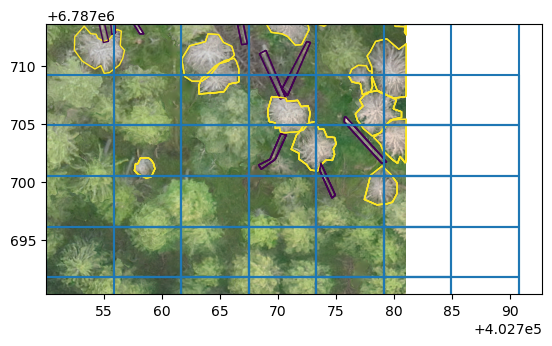

In [ ]:
untiled = gpd.read_file('example_data/untiled.geojson')
fig, ax = plt.subplots(1,1)
rioplot.show(raster, ax=ax)
tiler.grid.exterior.plot(ax=ax)
untiled.plot(ax=ax, column='label_id', facecolor='none')

Plot with the tiled grid.

<AxesSubplot: >

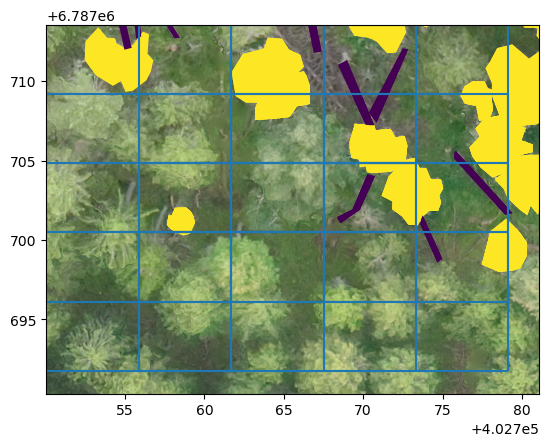

In [ ]:
untiled = gpd.read_file('example_data/untiled.geojson')
fig, ax = plt.subplots(1,1)
rioplot.show(raster, ax=ax)
tiler.grid.exterior.plot(ax=ax)
untiled.plot(ax=ax, column='label_id')

If `allow_partial_data=False` as is the default behaviour, tiling is done only for the area from which full sized patch can be extracted. With `allow_partial_data=True`, windows can "extend" to empty areas. This is useful with inference, when predicted areas can have wonky dimensions.

In [ ]:
tiler.tile_raster('example_data/R70C21.tif', allow_partial_data=True)

0it [00:00, ?it/s]

In [ ]:
tiler.tile_vector('example_data/R70C21.shp', min_area_pct=.2)

0it [00:00, ?it/s]

Untile shapefiles and check how they look

In [ ]:
untile_vector(f'example_data/tiles/vector_tiles', outpath='example_data/untiled.geojson')

  0%|          | 0/21 [00:00<?, ?it/s]

81 polygons before non-max suppression
81 polygons after non-max suppression


<AxesSubplot: >

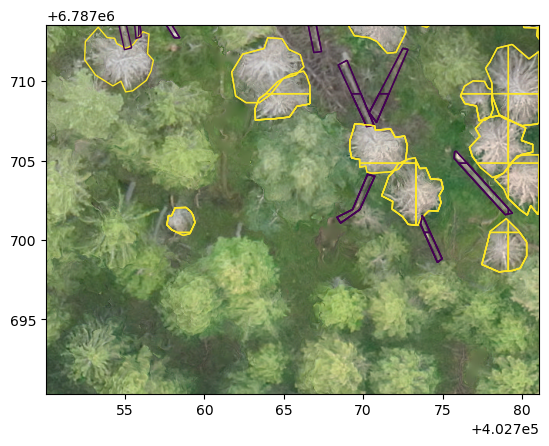

In [ ]:
untiled = gpd.read_file('example_data/untiled.geojson')
fig, ax = plt.subplots(1,1)
rioplot.show(raster, ax=ax)
#tiler.grid.exterior.plot(ax=ax)
untiled.plot(ax=ax, column='label_id', facecolor='none')

Plot with the tiled grid.

<AxesSubplot: >

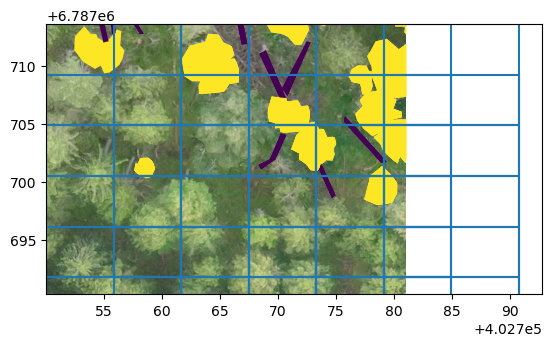

In [ ]:
untiled = gpd.read_file('example_data/untiled.geojson')
fig, ax = plt.subplots(1,1)
rioplot.show(raster, ax=ax)
tiler.grid.exterior.plot(ax=ax)
untiled.plot(ax=ax, column='label_id')

In [ ]:
tiler.tile_and_rasterize_vector('example_data/R70C21.tif', 'example_data/R70C21.shp', column='label_id')

0it [00:00, ?it/s]

In [ ]:
tiler.tile_and_rasterize_vector('example_data/R70C21.tif', 'example_data/R70C21.shp', 
                                column='label_id', keep_bg_only=True)

0it [00:00, ?it/s]

In [ ]:
import matplotlib.pyplot as plt

<matplotlib.image.AxesImage>

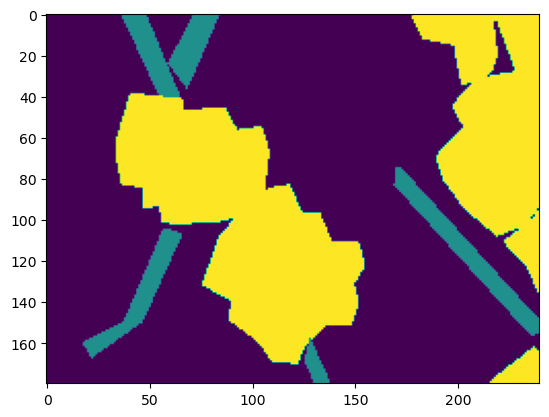

In [ ]:
with rio.open('example_data/tiles/rasterized_vector_tiles/R1C3.tif') as i: im = i.read()
plt.imshow(im[0])

[`untile_raster`](https://mayrajeo.github.io/drone_detector/processing.tiling.html#untile_raster) can be used to mosaic all patches into one.

In [ ]:
untile_raster('example_data/tiles/rasterized_vector_tiles/', 'example_data/tiles/mosaic_first.tif', 
              method='first')

<matplotlib.image.AxesImage>

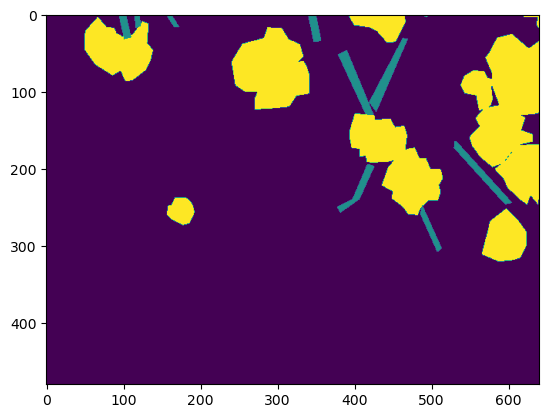

In [ ]:
with rio.open('example_data/tiles/mosaic_first.tif') as mos: mosaic = mos.read()
plt.imshow(mosaic[0])

By specifying method as sum it's possible to collate predictions and get the most likely label for pixels

In [ ]:
untile_raster('example_data/tiles/rasterized_vector_tiles/', 'example_data/tiles/mosaic_sum.tif',
              method='sum')

<matplotlib.image.AxesImage>

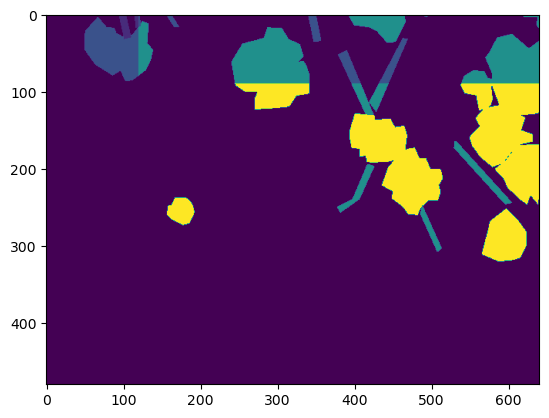

In [ ]:
with rio.open('example_data/tiles/mosaic_sum.tif') as mos: mosaic = mos.read()
plt.imshow(mosaic[0])